In [286]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')


In [332]:
train = pd.read_csv('~/Downloads/train.csv')

In [329]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [289]:
test = pd.read_csv('~/Downloads/test.csv')

In [290]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [291]:
test.shape

(233599, 11)

In [292]:
df = pd.concat([train,test],axis = 0)
df.head(20)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0   1000001  P00069042      F   0-17          10             A   
1   1000001  P00248942      F   0-17          10             A   
2   1000001  P00087842      F   0-17          10             A   
3   1000001  P00085442      F   0-17          10             A   
4   1000002  P00285442      M    55+          16             C   
5   1000003  P00193542      M  26-35          15             A   
6   1000004  P00184942      M  46-50           7             B   
7   1000004  P00346142      M  46-50           7             B   
8   1000004   P0097242      M  46-50           7             B   
9   1000005  P00274942      M  26-35          20             A   
10  1000005  P00251242      M  26-35          20             A   
11  1000005  P00014542      M  26-35          20             A   
12  1000005  P00031342      M  26-35          20             A   
13  1000005  P00145042      M  26-35          20             A   
14  1000006  P00231342      F  51-55           9             A   
15  1000006  P00190242      F  51-55           9             A   
16  1000006   P0096642      F  51-55           9             A   
17  1000006  P00058442      F  51-55           9             A   
18  1000007  P00036842      M  36-45           1             B   
19  1000008  P00249542      M  26-35          12             C   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               0                   3   
1                           2               0                   1   
2                           2               0                  12   
3                           2               0                  12   
4                          4+               0                   8   
5                           3               0                   1   
6                           2               1                   1   
7                           2               1                   1   
8                           2               1                   1   
9                           1               1                   8   
10                          1               1                   5   
11                          1               1                   8   
12                          1               1                   8   
13                          1               1                   1   
14                          1               0                   5   
15                          1               0                   4   
16                          1               0                   2   
17                          1               0                   5   
18                          1               1                   1   
19                         4+               1                   1   

    Product_Category_2  Product_Category_3  Purchase  
0                  NaN                 NaN    8370.0  
1                  6.0                14.0   15200.0  
2                  NaN                 NaN    1422.0  
3                 14.0                 NaN    1057.0  
4                  NaN                 NaN    7969.0  
5                  2.0                 NaN   15227.0  
6                  8.0                17.0   19215.0  
7                 15.0                 NaN   15854.0  
8                 16.0                 NaN   15686.0  
9                  NaN                 NaN    7871.0  
10                11.0                 NaN    5254.0  
11                 NaN                 NaN    3957.0  
12                 NaN                 NaN    6073.0  
13                 2.0                 5.0   15665.0  
14                 8.0                14.0    5378.0  
15                 5.0                 NaN    2079.0  
16                 3.0                 4.0   13055.0  
17                14.0                 NaN    8851.0  
18                14.0                16.0   11788.0  
19                 5.0                15.0   19614.0

In [293]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [294]:
df['Product_Category_1'].fillna(0,inplace=True)
df['Product_Category_2'].fillna(0,inplace=True)
df['Product_Category_3'].fillna(0,inplace=True)

In [295]:
df['Product_Category_1'].value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [296]:
df['Occupation'].value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

In [297]:
df['Product_ID'].unique

<bound method Series.unique of 0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
233594    P00118942
233595    P00254642
233596    P00031842
233597    P00124742
233598    P00316642
Name: Product_ID, Length: 783667, dtype: object>

In [298]:
df['User_ID'].unique

<bound method Series.unique of 0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
233594    1006036
233595    1006036
233596    1006036
233597    1006037
233598    1006039
Name: User_ID, Length: 783667, dtype: int64>

In [299]:
dt = df.drop(['User_ID','Product_ID'],axis=1)

In [300]:
dt

Gender    Age  Occupation City_Category Stay_In_Current_City_Years  \
0           F   0-17          10             A                          2   
1           F   0-17          10             A                          2   
2           F   0-17          10             A                          2   
3           F   0-17          10             A                          2   
4           M    55+          16             C                         4+   
...       ...    ...         ...           ...                        ...   
233594      F  26-35          15             B                         4+   
233595      F  26-35          15             B                         4+   
233596      F  26-35          15             B                         4+   
233597      F  46-50           1             C                         4+   
233598      F  46-50           0             B                         4+   

        Marital_Status  Product_Category_1  Product_Category_2  \
0                    0                   3                 0.0   
1                    0                   1                 6.0   
2                    0                  12                 0.0   
3                    0                  12                14.0   
4                    0                   8                 0.0   
...                ...                 ...                 ...   
233594               1                   8                 0.0   
233595               1                   5                 8.0   
233596               1                   1                 5.0   
233597               0                  10                16.0   
233598               1                   4                 5.0   

        Product_Category_3  Purchase  
0                      0.0    8370.0  
1                     14.0   15200.0  
2                      0.0    1422.0  
3                      0.0    1057.0  
4                      0.0    7969.0  
...                    ...       ...  
233594                 0.0       NaN  
233595                 0.0       NaN  
233596                12.0       NaN  
233597                 0.0       NaN  
233598                 0.0       NaN  

[783667 rows x 10 columns]

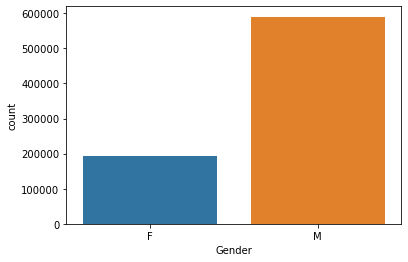

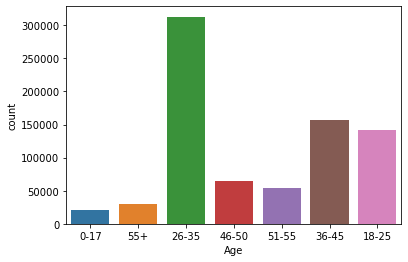

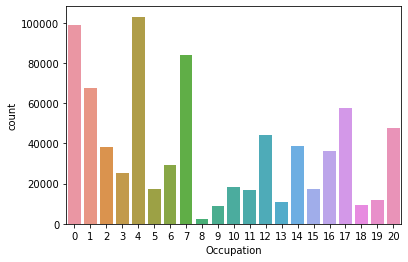

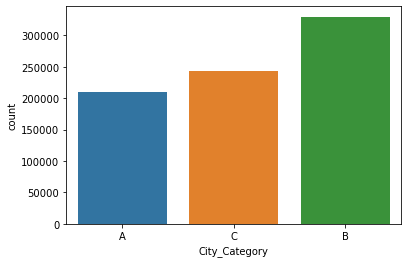

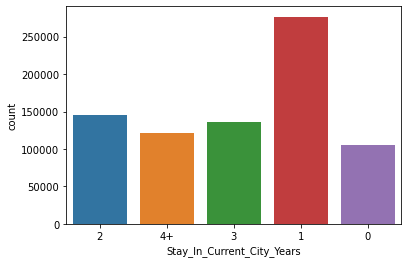

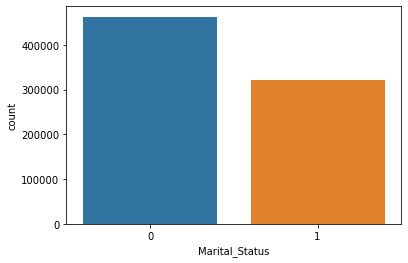

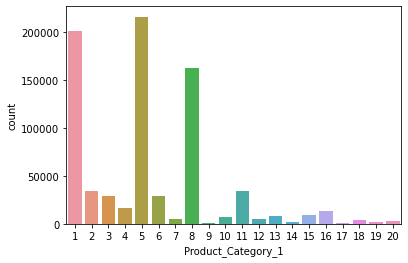

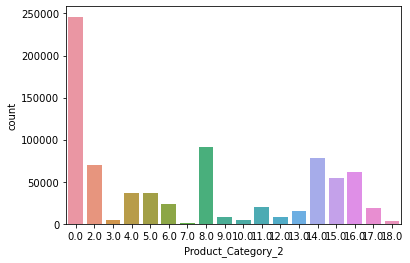

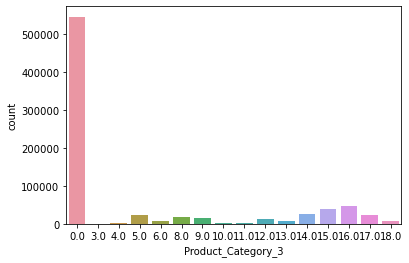

In [301]:
for i in dt.columns:
    if i != 'Purchase':
        sns.countplot(dt[i])
        plt.show()

In [302]:
dt.groupby(by=['Gender'])['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

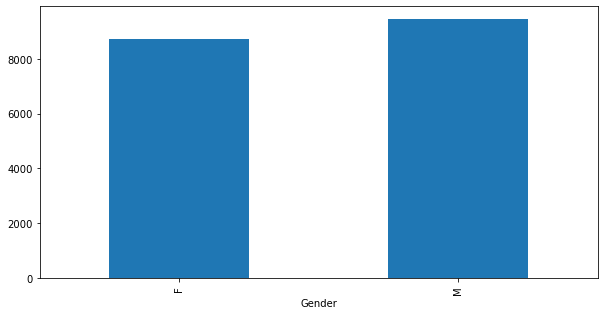

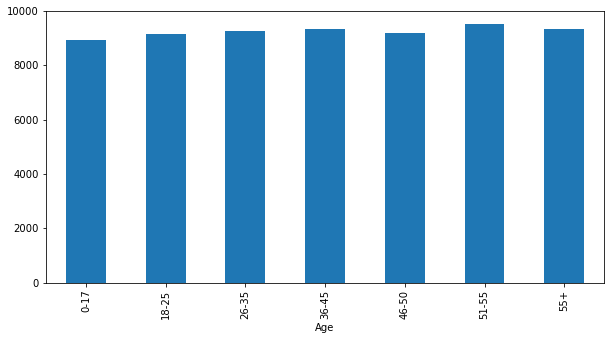

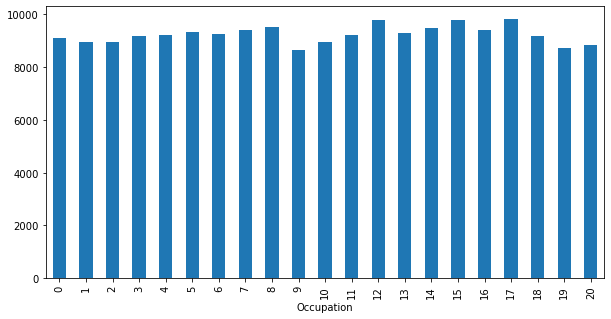

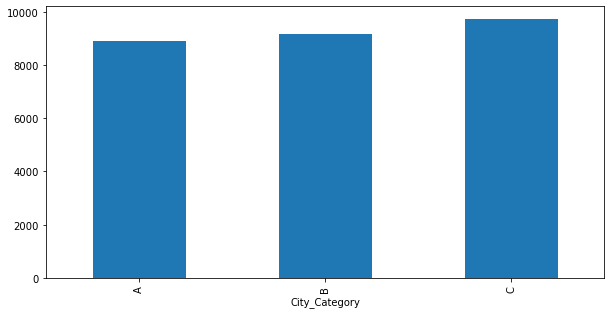

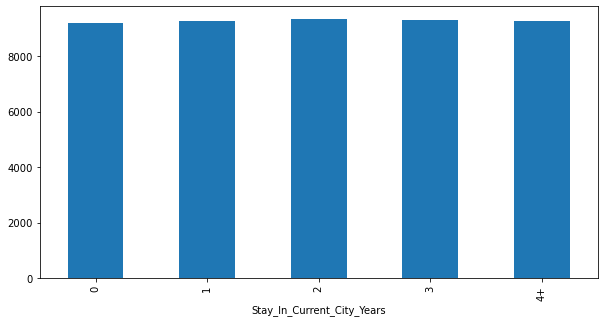

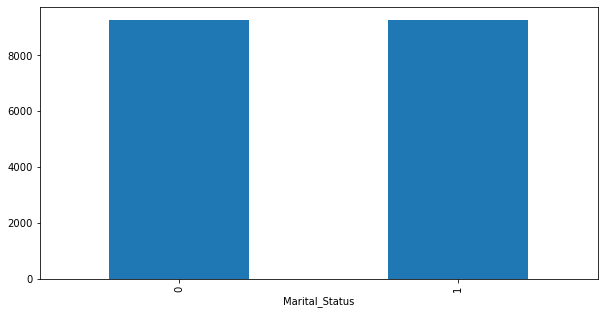

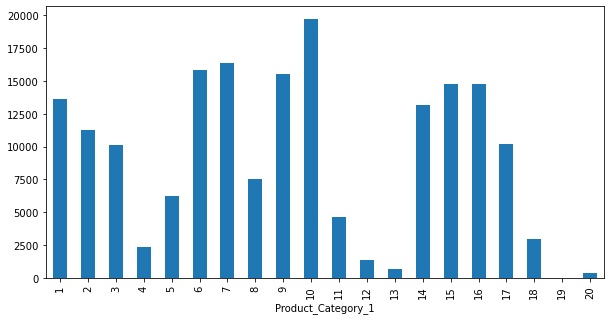

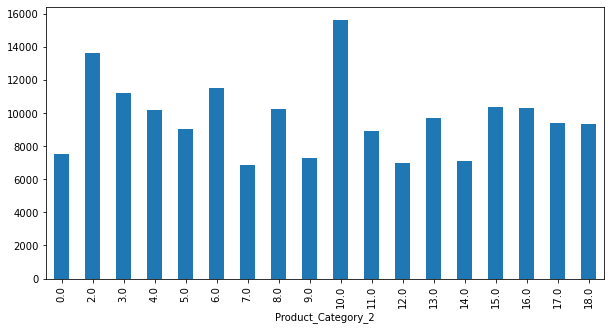

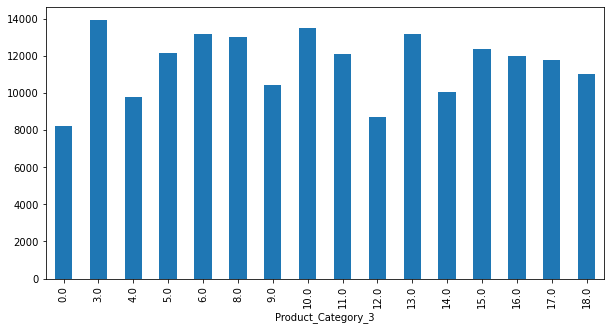

<Figure size 720x360 with 0 Axes>

In [303]:
for i in dt.columns:
    plt.figure(figsize=(10,5))
    if i != 'Purchase':
        dt.groupby(by=[i])['Purchase'].mean().plot(kind = 'bar')
        plt.show


In [304]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 65.8+ MB


In [305]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

<function matplotlib.pyplot.show(close=None, block=None)>

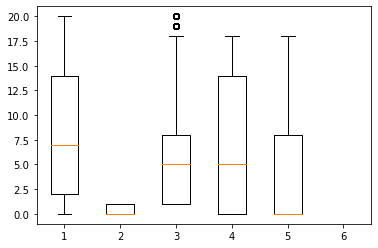

In [306]:
plt.boxplot(dt.select_dtypes(np.number))
plt.show

In [307]:
dt['Age'] = le.fit_transform(dt['Age'])
dt['Stay_In_Current_City_Years'] = le.fit_transform(dt['Stay_In_Current_City_Years'])
dt['Occupation'] = le.fit_transform(dt['Occupation'])

In [308]:
# dt['Age'] = dt['Age'].astype('object')

dm['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [309]:
train['Stay_In_Current_City_Years'].value_counts()
# dt['Stay_In_Current_City_Years'].replace('4+',4)

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [310]:
# dt['Stay_In_Current_City_Years'] = dt.Stay_In_Current_City_Years.replace(['4+','4'])


In [311]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  int32  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(3), object(2)
memory usage: 59.8+ MB


In [312]:
dm = pd.get_dummies(dt,drop_first = True)

In [313]:
# x['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [314]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         783667 non-null  int32  
 1   Occupation                  783667 non-null  int64  
 2   Stay_In_Current_City_Years  783667 non-null  int32  
 3   Marital_Status              783667 non-null  int64  
 4   Product_Category_1          783667 non-null  int64  
 5   Product_Category_2          783667 non-null  float64
 6   Product_Category_3          783667 non-null  float64
 7   Purchase                    550068 non-null  float64
 8   Gender_M                    783667 non-null  uint8  
 9   City_Category_B             783667 non-null  uint8  
 10  City_Category_C             783667 non-null  uint8  
dtypes: float64(3), int32(2), int64(3), uint8(3)
memory usage: 50.1 MB


In [379]:
train_f = dm[~(df['Purchase'].isnull())]
train_f

Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0         0          10                           2               0   
1         0          10                           2               0   
2         0          10                           2               0   
3         0          10                           2               0   
4         6          16                           4               0   
...     ...         ...                         ...             ...   
550063    5          13                           1               1   
550064    2           1                           3               0   
550065    2          15                           4               1   
550066    6           1                           2               0   
550067    4           0                           4               1   

        Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                        3                 0.0                 0.0    8370.0   
1                        1                 6.0                14.0   15200.0   
2                       12                 0.0                 0.0    1422.0   
3                       12                14.0                 0.0    1057.0   
4                        8                 0.0                 0.0    7969.0   
...                    ...                 ...                 ...       ...   
550063                  20                 0.0                 0.0     368.0   
550064                  20                 0.0                 0.0     371.0   
550065                  20                 0.0                 0.0     137.0   
550066                  20                 0.0                 0.0     365.0   
550067                  20                 0.0                 0.0     490.0   

        Gender_M  City_Category_B  City_Category_C  
0              0                0                0  
1              0                0                0  
2              0                0                0  
3              0                0                0  
4              1                0                1  
...          ...              ...              ...  
550063         1                1                0  
550064         0                0                1  
550065         0                1                0  
550066         0                0                1  
550067         0                1                0  

[550068 rows x 11 columns]

In [380]:
test_f = dm[(df['Purchase'].isnull())]
test_f

Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0         4           7                           2               1   
1         2          17                           0               0   
2         3           1                           4               1   
3         3           1                           4               1   
4         2           1                           1               0   
...     ...         ...                         ...             ...   
233594    2          15                           4               1   
233595    2          15                           4               1   
233596    2          15                           4               1   
233597    4           1                           4               0   
233598    4           0                           4               1   

        Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                        1                11.0                 0.0       NaN   
1                        3                 5.0                 0.0       NaN   
2                        5                14.0                 0.0       NaN   
3                        4                 9.0                 0.0       NaN   
4                        4                 5.0                12.0       NaN   
...                    ...                 ...                 ...       ...   
233594                   8                 0.0                 0.0       NaN   
233595                   5                 8.0                 0.0       NaN   
233596                   1                 5.0                12.0       NaN   
233597                  10                16.0                 0.0       NaN   
233598                   4                 5.0                 0.0       NaN   

        Gender_M  City_Category_B  City_Category_C  
0              1                1                0  
1              1                0                1  
2              0                1                0  
3              0                1                0  
4              0                0                1  
...          ...              ...              ...  
233594         0                1                0  
233595         0                1                0  
233596         0                1                0  
233597         0                0                1  
233598         0                1                0  

[233599 rows x 11 columns]

In [381]:
train.shape,test.shape

((550068, 12), (550068,))

In [382]:
train = train_f.drop('Purchase',axis = 1)

In [383]:
test = train_f['Purchase']

In [320]:
import  statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [384]:


x_train,x_test,y_train,y_test = train_test_split(train,test,random_state=10)

In [385]:
x_train.shape,y_train.shape

((412551, 10), (412551,))

In [386]:
x = sm.add_constant(x_train)
# x.drop(['Occupation_2','Occupation_11'],axis = 1,inplace = True) 
x

const  Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
427144    1.0    2           1                           1               1   
525945    1.0    1           4                           1               1   
322720    1.0    3          12                           1               0   
175146    1.0    5           6                           1               1   
249852    1.0    2          14                           4               0   
...       ...  ...         ...                         ...             ...   
299741    1.0    2           3                           3               0   
533660    1.0    2           0                           4               0   
105595    1.0    3           7                           2               0   
443712    1.0    4           1                           4               1   
345353    1.0    2           7                           3               0   

        Product_Category_1  Product_Category_2  Product_Category_3  Gender_M  \
427144                   8                 0.0                 0.0         0   
525945                   5                15.0                 0.0         1   
322720                   5                 0.0                 0.0         1   
175146                   5                 8.0                14.0         1   
249852                   1                14.0                16.0         0   
...                    ...                 ...                 ...       ...   
299741                   3                 4.0                 0.0         1   
533660                   5                 0.0                 0.0         1   
105595                   3                 5.0                 0.0         1   
443712                   8                 0.0                 0.0         0   
345353                   5                 0.0                 0.0         1   

        City_Category_B  City_Category_C  
427144                0                0  
525945                1                0  
322720                1                0  
175146                1                0  
249852                0                0  
...                 ...              ...  
299741                0                1  
533660                1                0  
105595                1                0  
443712                1                0  
345353                1                0  

[412551 rows x 11 columns]

In [324]:
model = sm.OLS(y_train,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     7408.
Date:                Fri, 26 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:54:44   Log-Likelihood:            -4.0670e+06
No. Observations:              412551   AIC:                         8.134e+06
Df Residuals:                  412540   BIC:                         8.134e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       9598.5695     29.444    325.997      0.000    9540.861    9656.278
Age                          104.1786      5.670     18.375      0.000      93.067     115.291
Occupation                     5.2825      1.117      4.728      0.000       3.093       7.473
Stay_In_Current_City_Years     6.9070      5.585      1.237      0.216      -4.040      17.854
Marital_Status               -54.1952     15.411     -3.517      0.000     -84.400     -23.990
Product_Category_1          -346.7985      1.990   -174.241      0.000    -350.700    -342.898
Product_Category_2            11.3352      1.165      9.731      0.000       9.052      13.618
Product_Category_3           144.4297      1.253    115.256      0.000     141.974     146.886
Gender_M                     476.8219     16.825     28.341      0.000     443.846     509.798
City_Category_B              144.9666     17.817      8.136      0.000     110.045     179.888
City_Category_C              632.3403     19.123     33.068      0.000     594.861     669.820
==============================================================================
Omnibus:                    42994.144   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59862.823
Skew:                           0.833   Prob(JB):                         0.00
Kurtosis:                       3.840   Cond. No.                         63.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [325]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [326]:
vif = [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]


In [327]:
pd.DataFrame({'VIF':vif[:]},index = x.columns)

VIF
const                       16.723411
Age                          1.135476
Occupation                   1.024246
Stay_In_Current_City_Years   1.001912
Marital_Status               1.107768
Product_Category_1           1.182791
Product_Category_2           1.010890
Product_Category_3           1.183651
Gender_M                     1.016851
City_Category_B              1.491810
City_Category_C              1.511723

In [339]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error

In [398]:
def model_result(model,x_train,y_train,x_test,y_test):
    print(str(model))
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2=r2_score(y_test,y_pred)
    n=x.shape[0]
    p=x.drop('const',axis=1).shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p-1)
    print('R2',r2)
    print('adj_R2',adj_r2)
    print('MSE ',mean_squared_error(y_test,y_pred))
    print('RMSE',mean_squared_error(y_test,y_pred)**0.5,'\n')

In [342]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor


In [399]:
from sklearn.metrics import nan_euclidean_distances


model_result(KNeighborsRegressor(n_neighbors=7),x_train,y_train,x_test,y_test)

KNeighborsRegressor(n_neighbors=7)
R2 0.598536862711875
adj_R2 0.5985271312158433
MSE  10135233.257209312
RMSE 3183.5881104830933 



In [354]:
scale = StandardScaler()
scaled = scale.fit_transform(x_train)
sc = scale.fit_transform(x_test)

In [355]:
x_ = pd.DataFrame(scaled,columns = x_train.columns)
x__ = pd.DataFrame(sc,columns = x_test.columns)

In [397]:

model_result(KNeighborsRegressor(n_neighbors=7),x_train,y_train,x_test,y_test)

KNeighborsRegressor(n_neighbors=7)


KeyError: "['const'] not found in axis"

In [352]:
y_train

427144     9953.0
525945     8735.0
322720     3669.0
175146     5220.0
249852     7870.0
           ...   
299741     8432.0
533660     3619.0
105595    10606.0
443712     9790.0
345353     7056.0
Name: Purchase, Length: 412551, dtype: float64

In [363]:
param = {'n_neighbors':[5,6,7,9,12]}

In [364]:
from sklearn.model_selection import GridSearchCV


gscv =GridSearchCV(estimator=KNeighborsClassifier(),param_grid=  param,scoring='r2',verbose=3,cv=2)

In [388]:
gscv.fit(x,y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2] END ....................n_neighbors=5;, score=-0.129 total time=  37.6s
[CV 2/2] END ....................n_neighbors=5;, score=-0.132 total time=  36.3s
[CV 1/2] END ....................n_neighbors=6;, score=-0.229 total time=  37.0s
[CV 2/2] END ....................n_neighbors=6;, score=-0.234 total time=  38.0s
[CV 1/2] END ....................n_neighbors=7;, score=-0.318 total time=  39.6s
[CV 2/2] END ....................n_neighbors=7;, score=-0.320 total time=  41.4s
[CV 1/2] END ....................n_neighbors=9;, score=-0.463 total time=  43.6s
[CV 2/2] END ....................n_neighbors=9;, score=-0.471 total time=  39.4s
[CV 1/2] END ...................n_neighbors=12;, score=-0.643 total time=  43.8s
[CV 2/2] END ...................n_neighbors=12;, score=-0.635 total time=  41.9s


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 9, 12]}, scoring='r2',
             verbose=3)

In [403]:
gscv.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [411]:
x_test.shape

(137517, 10)

In [406]:
param = {'max_depth':[5,6,7,9,12]}

In [407]:
gscv =GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=  param,scoring='r2',verbose=3,cv=3)

In [408]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END .........................max_depth=5;, score=nan total time=   0.4s
[CV 2/3] END .........................max_depth=5;, score=nan total time=   0.4s
[CV 3/3] END .........................max_depth=5;, score=nan total time=   0.4s
[CV 1/3] END .........................max_depth=6;, score=nan total time=   0.6s
[CV 2/3] END .........................max_depth=6;, score=nan total time=   0.5s
[CV 3/3] END .........................max_depth=6;, score=nan total time=   0.6s
[CV 1/3] END .........................max_depth=7;, score=nan total time=   0.7s
[CV 2/3] END .........................max_depth=7;, score=nan total time=   0.7s
[CV 3/3] END .........................max_depth=7;, score=nan total time=   0.7s
[CV 1/3] END .........................max_depth=9;, score=nan total time=   1.2s
[CV 2/3] END .........................max_depth=9;, score=nan total time=   1.2s
[CV 3/3] END .........................max_depth=9

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7, 9, 12]}, scoring='r2',
             verbose=3)

In [409]:
gscv.best_score_,gscv.best_params_

(nan, {'max_depth': 5})

In [410]:
model_result(DecisionTreeClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)

DecisionTreeClassifier(max_depth=5)


MemoryError: Unable to allocate 17.9 GiB for an array with shape (137517, 1, 17516) and data type float64